<a href="https://colab.research.google.com/github/AmeerAliSaleem/dig_data_shell_project/blob/main/DigData_Shell_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shell DigData Project Submission

---


## By Aadam Ul Haq and Ameer Ali Saleem

A notebook detailing the coding portion of the Shell DigData Step Up Challenge.

# Exploratory Data Analysis

We begin by exploring the datasets in an attempt to spot patterns and deal with erroneous data values.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
# importing datasets
daily = pd.read_csv('daily.csv')
hourly = pd.read_csv('hourly.csv')
weekly = pd.read_csv('weekly.csv')
monthly = pd.read_csv('monthly.csv')

In [ ]:
hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DateHour                             8760 non-null   object 
 1   Wind_Speed_Actual_Knots              8751 non-null   float64
 2   Production_Actual_MWh                8760 non-null   float64
 3   Production_Forecast_1hour_MWh        8760 non-null   float64
 4   Production_Forecast_6hour_MWh        8760 non-null   float64
 5   Production_24hour_MWh                8760 non-null   float64
 6   Electricity_Prices_Day_Ahead_Dollar  8760 non-null   float64
 7   Electricity_Prices_Spot_Dollar       8760 non-null   float64
dtypes: float64(7), object(1)
memory usage: 547.6+ KB


In [ ]:
hourly.describe()

,Wind_Speed_Actual_Knots,Production_Actual_MWh,Production_Forecast_1hour_MWh,Production_Forecast_6hour_MWh,Production_24hour_MWh,Electricity_Prices_Day_Ahead_Dollar,Electricity_Prices_Spot_Dollar
count,8751.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,15.150708,219.800691,207.072518,201.079037,191.862525,95.375027,93.285188
std,9.704591,320.797377,310.996068,305.458660,297.399502,25.168086,24.454762
min,-0.360000,-0.001400,0.002200,0.020000,0.010900,-11.400000,-10.890000
25%,7.990000,16.328050,14.755025,14.533400,14.766700,78.655000,76.970000
50%,12.850000,68.025850,61.688150,58.839600,55.213650,93.655000,91.515000
75%,20.125000,262.959775,238.127150,231.540450,211.982350,110.755000,108.260000
max,65.620000,1100.000000,1100.000000,1100.000000,1100.000000,317.590000,311.980000


In [ ]:
# should not have negative values for any of the columns!

hourly_numeric_cols = hourly.select_dtypes(include=np.number)
hourly[(hourly[hourly_numeric_cols.columns] > 0).all(1)]

,DateHour,Wind_Speed_Actual_Knots,Production_Actual_MWh,Production_Forecast_1hour_MWh,Production_Forecast_6hour_MWh,Production_24hour_MWh,Electricity_Prices_Day_Ahead_Dollar,Electricity_Prices_Spot_Dollar
0,01/01/2022 00:00,10.34,35.3697,30.2627,19.3683,11.2438,133.00,131.98
1,01/01/2022 01:00,9.52,27.5898,24.9854,19.2894,6.7481,138.45,138.43
2,01/01/2022 02:00,6.31,8.0303,13.5787,18.6246,10.6262,107.54,105.02
3,01/01/2022 03:00,7.38,12.8577,13.8099,17.0159,10.6262,105.54,104.18
4,01/01/2022 04:00,7.03,11.1329,10.5426,13.9052,12.3877,107.69,108.36
...,...,...,...,...,...,...,...,...
8755,31/12/2022 19:00,19.32,230.6487,351.0614,368.7158,430.8759,84.08,84.31
8756,31/12/2022 20:00,21.41,313.8503,353.9471,397.6853,469.8260,79.62,80.74
8757,31/12/2022 21:00,24.49,469.9885,328.6710,456.5035,536.3732,89.78,89.57
8758,31/12/2022 22:00,26.22,576.7006,444.4528,444.3124,594.8571,78.61,77.90


In [ ]:
# remove negative values from DataFrame for now
hourly = hourly[(hourly[hourly_numeric_cols.columns] > 0).all(1)]

In [ ]:
hourly.head()

,DateHour,Wind_Speed_Actual_Knots,Production_Actual_MWh,Production_Forecast_1hour_MWh,Production_Forecast_6hour_MWh,Production_24hour_MWh,Electricity_Prices_Day_Ahead_Dollar,Electricity_Prices_Spot_Dollar
0,01/01/2022 00:00,10.34,35.3697,30.2627,19.3683,11.2438,133.00,131.98
1,01/01/2022 01:00,9.52,27.5898,24.9854,19.2894,6.7481,138.45,138.43
2,01/01/2022 02:00,6.31,8.0303,13.5787,18.6246,10.6262,107.54,105.02
3,01/01/2022 03:00,7.38,12.8577,13.8099,17.0159,10.6262,105.54,104.18
4,01/01/2022 04:00,7.03,11.1329,10.5426,13.9052,12.3877,107.69,108.36


In [ ]:
hourly.count()

DateHour                               8737
Wind_Speed_Actual_Knots                8737
Production_Actual_MWh                  8737
Production_Forecast_1hour_MWh          8737
Production_Forecast_6hour_MWh          8737
Production_24hour_MWh                  8737
Electricity_Prices_Day_Ahead_Dollar    8737
Electricity_Prices_Spot_Dollar         8737
dtype: int64

<AxesSubplot:xlabel='Wind_Speed_Actual_Knots'>

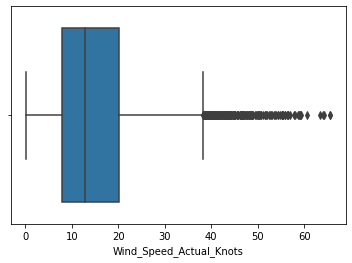

In [ ]:
sns.boxplot(x=hourly.iloc[:,1])

<AxesSubplot:xlabel='Wind_Speed_Actual_Knots'>

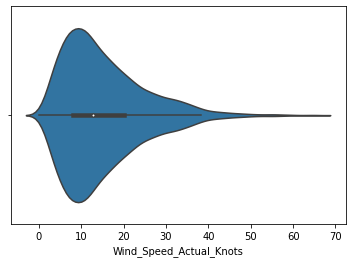

In [ ]:
sns.violinplot(x=hourly.iloc[:,1])

In [ ]:
daily.describe()

,Hydrogen_Demand_Actual_KG,Hydrogen_Demand_Forecast_KG
count,365.000000,365.000000
mean,16976.254795,17493.265753
std,5696.495785,4815.436566
min,0.000000,0.000000
25%,16988.000000,17137.000000
50%,18376.000000,18397.000000
75%,19789.000000,19797.000000
max,25472.000000,25506.000000


In [ ]:
daily.isnull().sum()

Date                           0
Hydrogen_Demand_Actual_KG      0
Hydrogen_Demand_Forecast_KG    0
dtype: int64

<AxesSubplot:xlabel='Hydrogen_Demand_Actual_KG', ylabel='Hydrogen_Demand_Forecast_KG'>

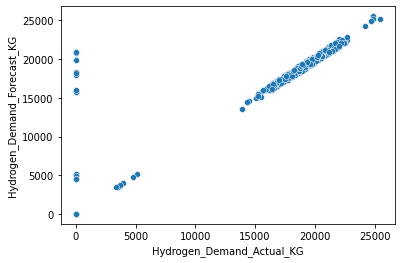

In [ ]:
sns.scatterplot(data=daily, x=daily.iloc[:,1], y=daily.iloc[:,2])

In [ ]:
# count the number of rows where actual hydrogen demand was supposedly zero
daily[daily.iloc[:,1]==0].count()
# daily[daily.iloc[:,2]==0].count()

Date                           28
Hydrogen_Demand_Actual_KG      28
Hydrogen_Demand_Forecast_KG    28
dtype: int64

In [ ]:
# investigate the zero values
daily[daily.iloc[:,1] == 0]

,Date,Hydrogen_Demand_Actual_KG,Hydrogen_Demand_Forecast_KG
37,07/02/2022,0,0
38,08/02/2022,0,0
39,09/02/2022,0,0
40,10/02/2022,0,0
41,11/02/2022,0,0
42,12/02/2022,0,0
43,13/02/2022,0,0
50,20/02/2022,0,15908
51,21/02/2022,0,17950
52,22/02/2022,0,18303


In [ ]:
daily[daily.iloc[:,2] == 0]

,Date,Hydrogen_Demand_Actual_KG,Hydrogen_Demand_Forecast_KG
37,07/02/2022,0,0
38,08/02/2022,0,0
39,09/02/2022,0,0
40,10/02/2022,0,0
41,11/02/2022,0,0
42,12/02/2022,0,0
43,13/02/2022,0,0
121,02/05/2022,0,0
122,03/05/2022,0,0
123,04/05/2022,0,0


In [ ]:
# we will replace the zero values with averages
average_actual = daily['Hydrogen_Demand_Actual_KG'][daily['Hydrogen_Demand_Actual_KG'] != 0].mean()
average_forecast = daily['Hydrogen_Demand_Forecast_KG'][daily['Hydrogen_Demand_Forecast_KG'] != 0].mean()

daily['Hydrogen_Demand_Actual_KG'] = daily['Hydrogen_Demand_Actual_KG'].replace(0, average_actual)
daily['Hydrogen_Demand_Forecast_KG'] = daily['Hydrogen_Demand_Forecast_KG'].replace(0, average_forecast)

# daily = daily[daily['Hydrogen_Demand_Actual_KG'] != 0]
# daily = daily[daily['Hydrogen_Demand_Forecast_KG'] != 0]

# daily[daily.iloc[:,1]==0].count()

daily.head()

,Date,Hydrogen_Demand_Actual_KG,Hydrogen_Demand_Forecast_KG
0,01/01/2022,17516.0,17925.0
1,02/01/2022,17578.0,17430.0
2,03/01/2022,16044.0,16407.0
3,04/01/2022,17471.0,17890.0
4,05/01/2022,17835.0,18080.0


<AxesSubplot:xlabel='Hydrogen_Demand_Actual_KG', ylabel='Hydrogen_Demand_Forecast_KG'>

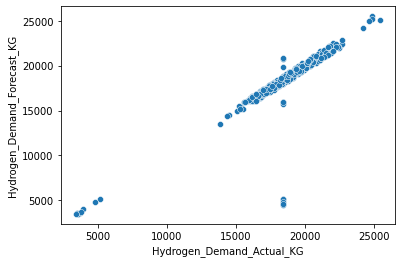

In [ ]:
sns.scatterplot(data=daily, x=daily.iloc[:,1], y=daily.iloc[:,2])

<AxesSubplot:xlabel='Hydrogen_Demand_Actual_KG', ylabel='Hydrogen_Demand_Forecast_KG'>

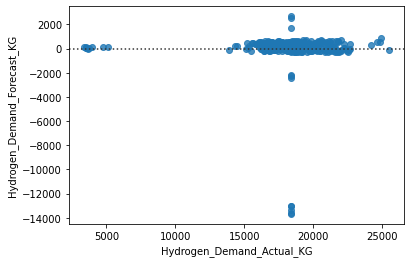

In [ ]:
sns.residplot(data=daily, x=daily.iloc[:,1], y=daily.iloc[:,2])

In [ ]:
# linear regression between actual and forecast hydrogen demand

res = stats.linregress(x=daily.iloc[:,1], y=daily.iloc[:,2])
print(res)

LinregressResult(slope=0.9921129175989359, intercept=-50.724186737708806, rvalue=0.8710175170791973, pvalue=4.2144560034866775e-114, stderr=0.02936873197230469, intercept_stderr=546.6756597844135)


In [ ]:
weekly.isnull().sum()

Week Commencing                0
Hydrogen_Demand_Forecast_KG    0
dtype: int64

In [ ]:
weekly.describe()

,Hydrogen_Demand_Forecast_KG
count,52.000000
mean,122109.384615
std,32899.008837
min,0.000000
25%,122483.250000
50%,127587.500000
75%,136691.250000
max,147822.000000


In [ ]:
weekly.count()

Week Commencing                52
Hydrogen_Demand_Forecast_KG    52
dtype: int64

In [ ]:
# investigate the zero values
weekly[weekly.iloc[:,1] == 0]

,Week Commencing,Hydrogen_Demand_Forecast_KG
5,07/02/2022,0
17,02/05/2022,0


<AxesSubplot:xlabel='Hydrogen_Demand_Forecast_KG', ylabel='Count'>

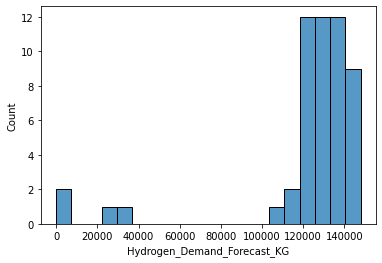

In [ ]:
sns.histplot(data = weekly, x = weekly.iloc[:,1])

In [ ]:
weekly[(weekly.iloc[:,1] > 20000) & (weekly.iloc[:,1] < 40000)]

,Week Commencing,Hydrogen_Demand_Forecast_KG
11,21/03/2022,25339
37,19/09/2022,34192


In [ ]:
monthly.count()

Month                                12
Hydrogen_Daily_Demand_Forecast_KG    12
dtype: int64

In [ ]:
monthly.isnull().sum()

Month                                0
Hydrogen_Daily_Demand_Forecast_KG    0
dtype: int64

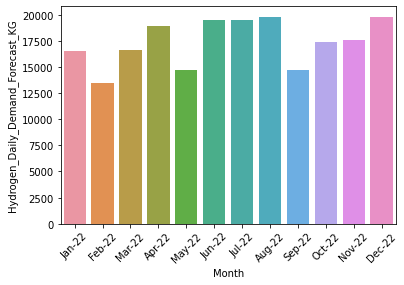

In [ ]:
sns.barplot(data=monthly, x=monthly.iloc[:,0], y=monthly.iloc[:,1])
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

## Feature engineering

We begin by calculating the kg of hydrogen produced from the amount of electricity. For simplicity, we will use the "Production_Actual_MWh" column:

In [ ]:
hourly["Hydrogen_gen_kg"] = hourly["Production_Actual_MWh"] * 1000 / 40 * 0.74

# sns.violinplot(data=hourly, x=hourly.iloc[0][:24], y=hourly["Hydrogen_gen_kg"][:24])
# locs, labels = plt.xticks()
# plt.setp(labels, rotation=45)
# plt.show()

# hourly.iloc[:,0][0][-5:]

hourly.head()

,DateHour,Wind_Speed_Actual_Knots,Production_Actual_MWh,Production_Forecast_1hour_MWh,Production_Forecast_6hour_MWh,Production_24hour_MWh,Electricity_Prices_Day_Ahead_Dollar,Electricity_Prices_Spot_Dollar,Hydrogen_gen_kg
0,01/01/2022 00:00,10.34,35.3697,30.2627,19.3683,11.2438,133.00,131.98,654.33945
1,01/01/2022 01:00,9.52,27.5898,24.9854,19.2894,6.7481,138.45,138.43,510.41130
2,01/01/2022 02:00,6.31,8.0303,13.5787,18.6246,10.6262,107.54,105.02,148.56055
3,01/01/2022 03:00,7.38,12.8577,13.8099,17.0159,10.6262,105.54,104.18,237.86745
4,01/01/2022 04:00,7.03,11.1329,10.5426,13.9052,12.3877,107.69,108.36,205.95865


We now plot the distribution of electricity prices across each of the twenty-four hours of the day:

In [ ]:
#hourly["Hour"] = hourly["DateHour"].apply(lambda x: x[-5:])
hourly["DateHour"] = pd.to_datetime(hourly["DateHour"])
hourly.head()

,DateHour,Wind_Speed_Actual_Knots,Production_Actual_MWh,Production_Forecast_1hour_MWh,Production_Forecast_6hour_MWh,Production_24hour_MWh,Electricity_Prices_Day_Ahead_Dollar,Electricity_Prices_Spot_Dollar,Hydrogen_gen_kg
0,2022-01-01 00:00:00,10.34,35.3697,30.2627,19.3683,11.2438,133.00,131.98,654.33945
1,2022-01-01 01:00:00,9.52,27.5898,24.9854,19.2894,6.7481,138.45,138.43,510.41130
2,2022-01-01 02:00:00,6.31,8.0303,13.5787,18.6246,10.6262,107.54,105.02,148.56055
3,2022-01-01 03:00:00,7.38,12.8577,13.8099,17.0159,10.6262,105.54,104.18,237.86745
4,2022-01-01 04:00:00,7.03,11.1329,10.5426,13.9052,12.3877,107.69,108.36,205.95865


In [ ]:
hourly["Month"] = hourly["DateHour"].dt.month
# hourly["Month"].head(40)

0    0
1    1
2    2
3    3
4    4
Name: Hour, dtype: int64


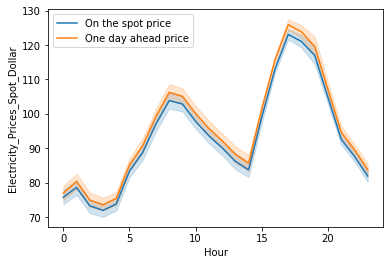

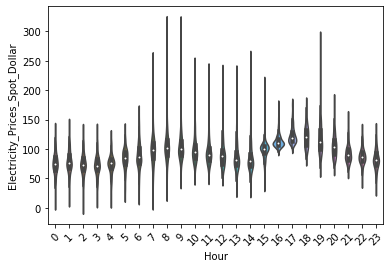

In [ ]:
# Data analysis with the hour of day
hourly["Hour"] = hourly["DateHour"].dt.hour
print(hourly["Hour"].head())

sns.lineplot(data=hourly, x=hourly["Hour"], y=hourly["Electricity_Prices_Spot_Dollar"], label="On the spot price")
sns.lineplot(data=hourly, x=hourly["Hour"], y=hourly["Electricity_Prices_Day_Ahead_Dollar"], label="One day ahead price")
locs, labels = plt.xticks()
#plt.setp(labels, rotation=45)
plt.legend()
plt.show()

sns.violinplot(data=hourly, x=hourly["Hour"], y=hourly["Electricity_Prices_Spot_Dollar"])
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

The one-day-ahead prices appear to be higher than the on-the-day prices. Hence, it makes sense for us to buy electricity on the spot when needed. Moreover, if we ever need to buy electricity, we can pick two equidistent points in time (from the above graph we could pick, say, 3am and 3pm) and determine in the present moment whether we need to purchase electricity or not.

We now observe the correlation between wind speed and actual electricity produced:



In [ ]:
# hourly["DateHour"][hourly["Production_Actual_MWh"] == hourly["Production_Actual_MWh"].max()]
# hourly[hourly["Production_Actual_MWh"] > 1000].iloc[:,0]

<AxesSubplot:xlabel='Wind_Speed_Actual_Knots', ylabel='Production_Actual_MWh'>

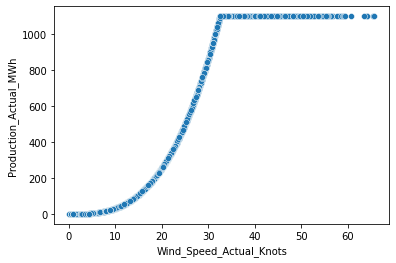

In [ ]:
sns.scatterplot(data=hourly, x=hourly.iloc[:,1], y=hourly.iloc[:,2])

It appears as though the electricity generated is maximised past roughly 30 knots.



We decided to take the maximum value between the predicted and actual demand values, to ensure that we satisfy the worst-case scenario for hydrogen demand. We will later factor in the maximum hydrogen capacity of 86 tonnes.

In [ ]:
daily['max_demand'] = daily.max(axis=1)

daily.head()

<ipython-input-36-5af48c174d6a>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  daily['max_demand'] = daily.max(axis=1)


,Date,Hydrogen_Demand_Actual_KG,Hydrogen_Demand_Forecast_KG,max_demand
0,01/01/2022,17516.0,17925.0,17925.0
1,02/01/2022,17578.0,17430.0,17578.0
2,03/01/2022,16044.0,16407.0,16407.0
3,04/01/2022,17471.0,17890.0,17890.0
4,05/01/2022,17835.0,18080.0,18080.0


# Ideas/Brainstorm

- Naive approach: always fill the hydrogen tank to the maximum capacity of 86 tonnes, selling through the rest of the day or until the hydrogen demand resurfaces, whichever comes first. This is the simplest method to implement, but will not necessarily yield the greatest profit.

We will start by taking the "Hydrogen_gen_kg" that we made in the hourly dataset and will compare the daily aggregation of these values to those in the daily dataset. This will tell us the excess amount of hydrogen we have at the end of each day, allowing us to infer a buying/selling strategy.

In [ ]:
# hydrogen_per_day = hourly["Hydrogen_gen_kg"].groupby(hourly["DateHour"]).sum()
# hydrogen_per_day

hourly_new_index = hourly.copy()

# Set the index to a datetime column
hourly_new_index.index = pd.date_range(start='2022-01-01', periods=len(hourly_new_index), freq='H')

# Group by every 24 hours using pd.Grouper
grouped = hourly_new_index.groupby(pd.Grouper(freq='24H'))

# Sum up the values in each group
summed = grouped.sum()

summed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2022-01-01 to 2022-12-31
Freq: 24H
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Wind_Speed_Actual_Knots              365 non-null    float64
 1   Production_Actual_MWh                365 non-null    float64
 2   Production_Forecast_1hour_MWh        365 non-null    float64
 3   Production_Forecast_6hour_MWh        365 non-null    float64
 4   Production_24hour_MWh                365 non-null    float64
 5   Electricity_Prices_Day_Ahead_Dollar  365 non-null    float64
 6   Electricity_Prices_Spot_Dollar       365 non-null    float64
 7   Hydrogen_gen_kg                      365 non-null    float64
 8   Month                                365 non-null    int64  
 9   Hour                                 365 non-null    int64  
dtypes: float64(8), int64(2)
memory usage: 31.4 KB


In [ ]:
result = summed["Hydrogen_gen_kg"]

In [ ]:
summed.reset_index()

,index,Wind_Speed_Actual_Knots,Production_Actual_MWh,Production_Forecast_1hour_MWh,Production_Forecast_6hour_MWh,Production_24hour_MWh,Electricity_Prices_Day_Ahead_Dollar,Electricity_Prices_Spot_Dollar,Hydrogen_gen_kg,Month,Hour
0,2022-01-01,228.39,772.5928,676.7660,620.3291,587.7066,2868.09,2828.72,14292.96680,24,276
1,2022-01-02,289.36,1491.9359,1308.7678,1284.6949,1274.1076,3087.07,3076.74,27600.81415,48,276
2,2022-01-03,383.17,3319.0171,3031.8792,2912.0951,2595.6325,3679.55,3476.88,61401.81635,72,276
3,2022-01-04,488.99,7108.5844,6457.4834,6087.9945,5082.8403,3609.07,3422.26,131508.81140,96,276
4,2022-01-05,491.76,6917.3756,6517.9080,6606.3100,6824.8879,3122.82,3032.76,127971.44860,120,276
...,...,...,...,...,...,...,...,...,...,...,...
360,2022-12-27,683.88,16519.3472,16385.2765,16251.8756,15751.4660,1784.37,1716.18,305607.92320,288,276
361,2022-12-28,581.89,14220.3127,12827.2716,12030.4814,10400.5489,1821.88,1785.44,263075.78495,288,276
362,2022-12-29,847.53,25610.5624,25845.6369,25752.7397,25932.1374,1866.76,1770.27,473795.40440,288,276
363,2022-12-30,677.86,17683.6978,17293.4700,17599.1799,18582.1902,2044.37,2041.86,327148.40930,288,276


In [ ]:
# the belown needs to be fixed


#daily

result.reset_index(drop=True)
# daily["Hydrogen_generated_kg"] = result
# daily = pd.concat([daily, result], axis=1)

daily = daily.assign(Hydrogen_generated_kg=result.values)

In [ ]:
daily

,Date,Hydrogen_Demand_Actual_KG,Hydrogen_Demand_Forecast_KG,max_demand,Hydrogen_generated_kg
0,01/01/2022,17516.0,17925.0,17925.0,14292.96680
1,02/01/2022,17578.0,17430.0,17578.0,27600.81415
2,03/01/2022,16044.0,16407.0,16407.0,61401.81635
3,04/01/2022,17471.0,17890.0,17890.0,131508.81140
4,05/01/2022,17835.0,18080.0,18080.0,127971.44860
...,...,...,...,...,...
360,27/12/2022,24899.0,25506.0,25506.0,305607.92320
361,28/12/2022,25472.0,25103.0,25472.0,263075.78495
362,29/12/2022,24878.0,25203.0,25203.0,473795.40440
363,30/12/2022,22706.0,22848.0,22848.0,327148.40930


In [ ]:
daily["Leftover_hydrogen"] = daily["Hydrogen_generated_kg"] - daily["max_demand"]

daily

,Date,Hydrogen_Demand_Actual_KG,Hydrogen_Demand_Forecast_KG,max_demand,Hydrogen_generated_kg,Leftover_hydrogen
0,01/01/2022,17516.0,17925.0,17925.0,14292.96680,-3632.03320
1,02/01/2022,17578.0,17430.0,17578.0,27600.81415,10022.81415
2,03/01/2022,16044.0,16407.0,16407.0,61401.81635,44994.81635
3,04/01/2022,17471.0,17890.0,17890.0,131508.81140,113618.81140
4,05/01/2022,17835.0,18080.0,18080.0,127971.44860,109891.44860
...,...,...,...,...,...,...
360,27/12/2022,24899.0,25506.0,25506.0,305607.92320,280101.92320
361,28/12/2022,25472.0,25103.0,25472.0,263075.78495,237603.78495
362,29/12/2022,24878.0,25203.0,25203.0,473795.40440,448592.40440
363,30/12/2022,22706.0,22848.0,22848.0,327148.40930,304300.40930


# Strategy 2:

The above result gave us the following idea:

_Insert explanation here_

In [ ]:
daily["Date"] = pd.to_datetime(daily["Date"])

print(daily["Date"][daily["Leftover_hydrogen"] < 0])

0     2022-01-01
9     2022-10-01
14    2022-01-15
30    2022-01-31
36    2022-06-02
         ...    
350   2022-12-17
351   2022-12-18
352   2022-12-19
353   2022-12-20
364   2022-12-31
Name: Date, Length: 109, dtype: datetime64[ns]


It appears as though there are 109 days in which there is an insufficient amount of hydrogen in the tank.

In [ ]:
daily["Leftover_hydrogen"].min()

-20175.30065

The greatest defecit of leftover hydrogen on an individual day is given above.

In [ ]:
# excesses = daily["Leftover_hydrogen"]
# worst_excess = 0

# for i in range(len(excesses)):
#   worst_excess_in_a_row = 1
#   current_worst_excess = 0
#   if excesses[i] < 0:
#     current_worst_excess = excesses[i]
#     for j in range(i+1,len(excesses)):
#       if excesses[j] < 0:
#         worst_excess_in_a_row += 1
#         current_worst_excess += excesses[j]
#       else:
#         break
#     if current_worst_excess < worst_excess:
#       worst_excess = current_worst_excess

# print("The worst accumulation excess hydrogen needed for storage is", worst_excess)
# print("The worst accumulation excess hydrogen needed for storage in a row is", worst_excess_in_a_row)


350   -15404.74005
351   -14806.36645
352   -12592.05670
353   -17866.42510
Name: Leftover_hydrogen, dtype: float64


## Which forecasting value is the most accurate?

<AxesSubplot:>

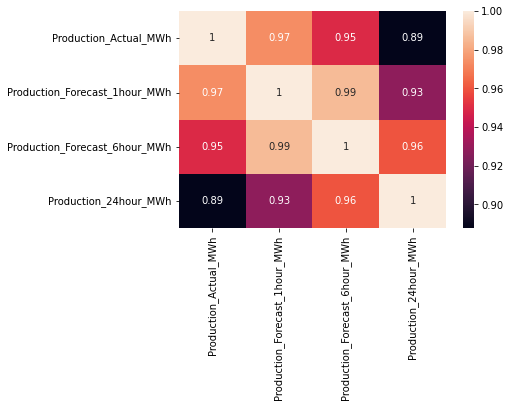

In [ ]:
production_values = hourly[["Production_Actual_MWh", "Production_Forecast_1hour_MWh", "Production_Forecast_6hour_MWh", "Production_24hour_MWh"]]

correlation = production_values.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

From the above, it is clear that the forecast an hour before is the most related to the actual electricity production value. However, it is important for us to investigate how accuracte the 6-hour and 24-hour forecasts are as well; if we choose to only buy electricity at two times in the day (e.g. 2am and 2pm), then we must ensure relative accuracy in such forecasts.

## The profit function

In [ ]:
def TheFunction(x, y): #x is the daily data, y is the hourly
  reserve_amount = 86_000
  current_amount = 10_000
  days = x.shape(0) #Number of days in data given
  for i in range(days):
    daily_left = x.iloc[i]['Leftover_Hydrogen']
    if (daily_left >= 0) and (current_amount + daily_left <= reserve_amount):
      current_amount += daily_left
    elif (daily_left >= 0) and (current_amount + daily_left > reserve_amount):
      current_amount += daily_left
      sell = current_amount - 86_000
      current_amount = 86_000
    else:
      current_amount += daily_left
      buy = daily_left
      
